# Comparison between our results and that of DAGMA

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# import result csvs
dagma_results = pd.read_csv('dagma_results.csv')
notears_results = pd.read_csv('notears_results.csv')
golem_results = pd.read_csv('golem_results.csv')

In [46]:
# import results from dagma paper
paper_results = pd.read_csv('dagma_paper_results.csv')

In [47]:
# add d column
ds = [20, 30, 50, 80, 100]
dagma_results['d'] = ds
notears_results['d'] = ds
golem_results['d'] = ds

In [48]:
dagma_results

,shd,time,d
0,8,6.870419,20
1,12,9.674032,30
2,9,17.911290,50
3,17,42.770548,80
4,16,63.866436,100


In [49]:
notears_results

,shd,time,d
0,11,33.330687,20
1,19,107.836853,30
2,37,268.879308,50
3,65,642.329862,80
4,86,1108.492175,100


In [50]:
golem_results

,shd,time,d
0,5,157.576992,20
1,10,181.101169,30
2,21,237.323341,50
3,33,330.800510,80
4,58,473.244076,100


In [51]:
paper_results

,Method,d,SHD,SHD_INT,Runtime,Runtime_INT
0,DAGMA,20,6.78,1.64,6.54,0.42
1,DAGMA,30,11.05,2.50,8.99,0.62
2,DAGMA,50,12.03,3.42,16.88,0.98
3,DAGMA,80,13.92,4.44,41.55,3.30
4,DAGMA,100,17.80,5.72,59.36,4.80
5,GOLEM,20,4.28,1.38,154.64,2.50
6,GOLEM,30,9.48,3.10,177.21,5.62
7,GOLEM,50,19.60,7.30,231.53,3.58
8,GOLEM,80,33.68,12.87,324.41,7.10
9,GOLEM,100,70.95,26.11,458.94,8.62


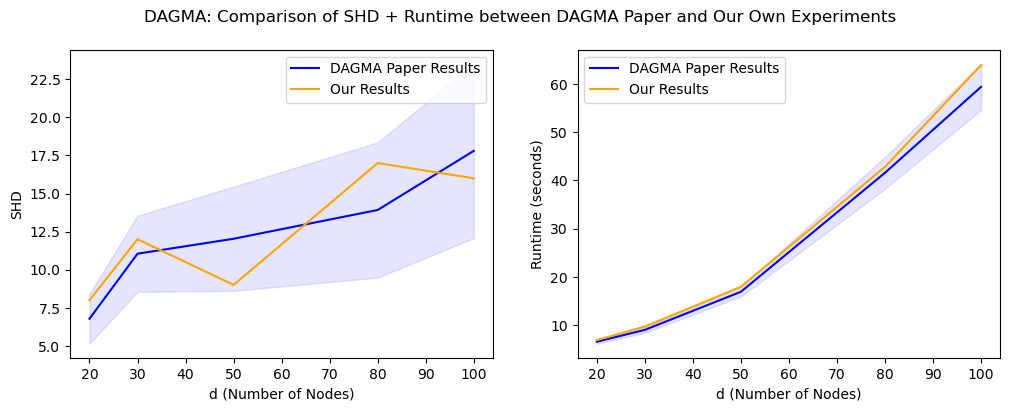

In [54]:
# plot to compare
def plot_comparison(paper, method):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(paper['d'], paper['SHD'], c='blue', label='DAGMA Paper Results')
    ax1.plot(method['d'], method['shd'], c='orange', label='Our Results')

    ax1.fill_between(paper['d'], (paper['SHD']-paper['SHD_INT']), (paper['SHD']+paper['SHD_INT']), color='blue', alpha=0.1)


    method_name = paper.iloc[0]['Method']
    # ax1.set_title(f'{method_name}: Comparison of SHD between DAGMA Paper and Our Own Experiments')
    ax1.legend()
    ax1.set_xlabel('d (Number of Nodes)')
    ax1.set_ylabel('SHD')




    ax2.plot(paper['d'], paper['Runtime'], c='blue', label='DAGMA Paper Results')
    ax2.plot(method['d'], method['time'], c='orange', label='Our Results')

    ax2.fill_between(paper['d'], (paper['Runtime']-paper['Runtime_INT']), (paper['Runtime']+paper['Runtime_INT']), color='blue', alpha=0.1)


    method_name = paper.iloc[0]['Method']
    # ax2.set_title(f'{method_name}: Comparison of Runtuime between DAGMA Paper and Our Own Experiments')
    ax2.legend()
    ax2.set_xlabel('d (Number of Nodes)')
    ax2.set_ylabel('Runtime (seconds)')


    fig.suptitle(f'{method_name}: Comparison of SHD + Runtime between DAGMA Paper and Our Own Experiments')








plot_comparison(paper_results[paper_results['Method']=='DAGMA'], dagma_results)


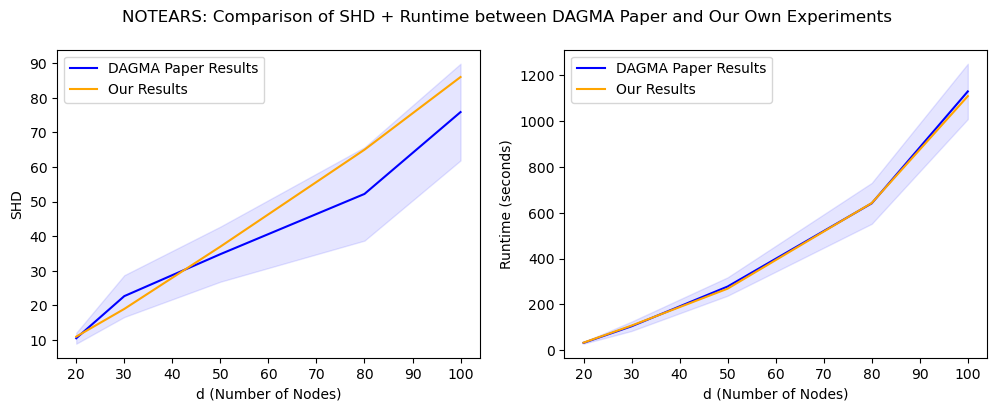

In [56]:
plot_comparison(paper_results[paper_results['Method']=='NOTEARS'], notears_results)


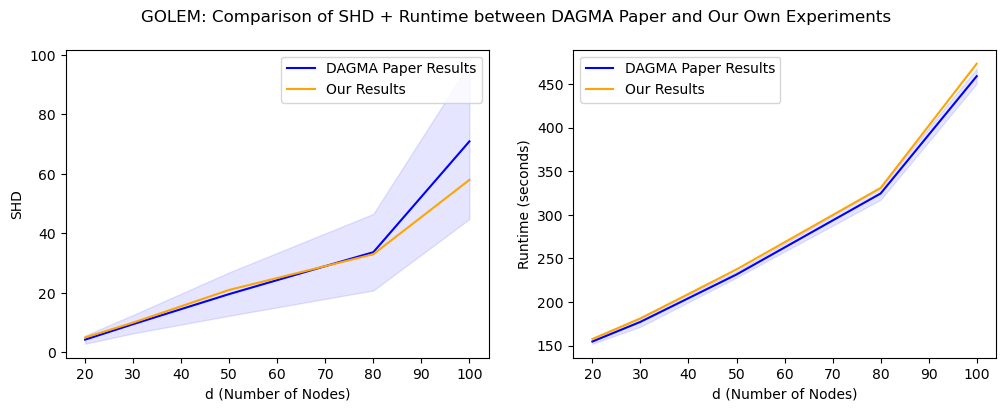

In [57]:
plot_comparison(paper_results[paper_results['Method']=='GOLEM'], golem_results)
